## Latar Belakang
Dalam konteks pertumbuhan positif yang dialami oleh supermarket, penting bagi manajemen untuk memahami lebih dalam perilaku dan karakteristik pelanggan mereka. Dengan pemahaman yang mendalam ini, supermarket dapat meningkatkan strategi pemasaran, mengoptimalkan penawaran produk, dan meningkatkan pengalaman pelanggan secara keseluruhan.

Oleh karena itu, sebagai Data Scientist, tugas Anda adalah untuk menganalisis data pelanggan supermarket dan mengidentifikasi segmentasi pelanggan berdasarkan perilaku dan karakteristik mereka saat berbelanja. Tujuan akhirnya adalah memberikan rekomendasi produk yang lebih personal dan relevan kepada pelanggan, meningkatkan kepuasan pelanggan, dan mendukung pertumbuhan revenue yang berkelanjutan.

Dengan pemahaman yang lebih mendalam tentang pelanggan, supermarket dapat lebih efektif dalam mempertahankan dan menarik pelanggan baru, serta memperkuat posisi mereka di pasar yang semakin kompetitif.

## Pernyataan Masalah
Sebagai perusahaan ritel yang beroperasi dalam industri supermarket, perusahaan memiliki tujuan untuk memahami karakteristik costumer yang loyal dan berharga tinggi. Dengan informasi ini, perusahaan dapat mengembangkan strategi pemasaran yang lebih efektif dan menyesuaikan layanan perusahaan untuk mempertahankan dan menarik pelanggan yang bernilai.

Dengan mempertimbangkan berbagai faktor yang mempengaruhi perilaku pembelian konsumen, perusahaan ingin seoarang data analyst untuk menjawab pertanyaan berikut:

- Apa saja ciri-ciri khas costumer yang loyal dan memiliki nilai tinggi bagi perusahaan perusahaan?
- Bagaimana perusahaan dapat mengidentifikasi segmentasi pelanggan yang membeli secara online dan offline, serta bagaimana kita dapat mengoptimalkan pengalaman mereka sesuai dengan preferensi dan kebutuhan masing-masing?

Dengan memperjelas tujuan perusahaan dalam memahami perilaku dan preferensi pelanggan, perusahaan berharap dapat mengumpulkan informasi yang lebih akurat dan relevan untuk membimbing keputusan strategis dan taktis perusahaan dalam meningkatkan loyalitas pelanggan dan pertumbuhan bisnis secara keseluruhan.

# Data
Untuk menjawab pertanyaan di atas, kita akan menganalisa data costumer yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://drive.google.com/drive/folders/1WodnBbuYTvsF0-6HTuQABQ0KCS31lqbK).    

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind, pearsonr


pd.set_option('display.max_columns', 200)
import warnings
warnings.filterwarnings("ignore")

Dataset ini berisi informasi terkait (Sebelum Cleaning)

** People
* ID: Customer's unique identifier
* Age_Category: Customer's Age Category
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company

** Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

** Places
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalog
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to the company’s website in the last months
* OnlineP: Number of purchases customer made through online store
* OfflineP: Number of purchases customer made through offline store

** RFM
* Recency: Number of days since customer's last purchase
* Frequency: Number of how often a customer make a purchase 
* Monatery: Number of how many amount a customer spend

Berikut 5 baris teratas dan terbawah dari dataset Supemarket Costumer.

In [80]:
df = pd.read_csv(r'Y:\TestPython\Purwadhika\DataFrame\data_cleaning_Supermarket.csv')

df

,ID,Age,Age_Category,Education,Marital_Status,Kidhome,Teenhome,Income,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,OnlineP,OfflineP,Recency,Frequency,Monatery
0,5524,57,Adult,Graduation,Single,0,0,58138.0,2012-09,635,88,546,172,88,88,8,10,4,18,4,58,25,1617
1,2174,60,Adult,Graduation,Single,1,1,46344.0,2014-03,11,1,6,2,1,6,1,1,2,2,2,38,6,27
2,4141,49,Adult,Graduation,Together,0,0,71613.0,2013-08,426,49,127,111,21,42,8,2,10,10,10,26,21,776
3,6182,30,Adult,Graduation,Together,1,0,26646.0,2014-02,11,4,20,10,3,5,2,0,4,2,4,26,8,53
4,5324,33,Adult,PhD,Together,1,0,58293.0,2014-01,173,43,118,46,27,15,5,3,6,8,6,94,19,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,Adult,Graduation,Together,0,1,61223.0,2013-06,709,43,182,42,118,247,9,3,4,12,4,46,18,1341
2236,4001,68,Old,PhD,Together,2,1,64014.0,2014-06,406,0,30,0,0,8,8,2,5,10,5,56,22,444
2237,7270,33,Adult,Graduation,Single,0,0,56981.0,2014-01,908,48,217,32,12,24,2,3,13,5,13,91,19,1241
2238,8235,58,Adult,Master,Together,0,1,69245.0,2014-01,428,30,214,80,30,61,6,5,10,11,10,8,23,843


## Data Analysis

### Check Correlation between the columns of Products Sales

In [81]:
df.columns

Index(['ID', 'Age', 'Age_Category', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Income', 'Dt_Customer', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'OnlineP', 'OfflineP', 'Recency', 'Frequency',
       'Monatery'],
      dtype='object')

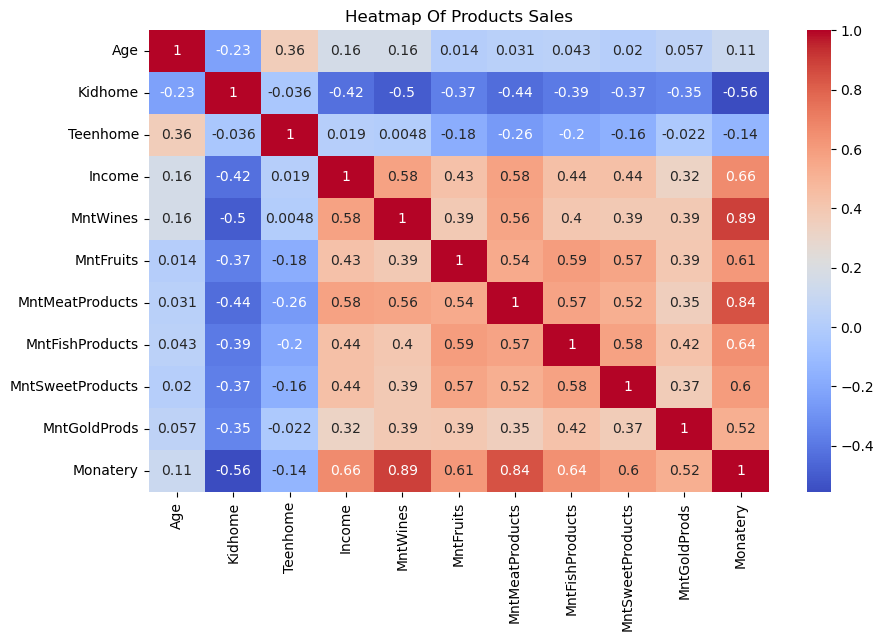

In [82]:

# Calculate correlations
C_products = df[['Age', 'Kidhome','Teenhome','Income', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Monatery']].corr()

# correlation

plt.figure(figsize= (10,6))
sns.heatmap(C_products, annot=True, cmap='coolwarm')
plt.title('Heatmap Of Products Sales')
plt.show()




Berdasarkan uji korelasi yang sudah dilakukan diatas, ada beberapa kesimpulan yang dapat diambil untuk analysis kedepannya:

- Column `Age` memiliki correlation yang positive dengan pembelian produk, hanya saja correlation yang terjadi diantaranya tidak begitu kuat 
- Column `Kidhome` memiliki corelasi yang negative dengan pembelian produk dan corelasi yang terbentuk lumayan kuat
- Column `Teenhome` memiliki corelasi yang negative pada pembelian produk, kecuali (produk Wines), tetapi tetap saja corelasi yang ada tidak begitu kuat
- Column `Income` memiliki corelasi yang positive dengan pembelian produk, corelasi yang terjadipun bervariasi ada yang kuat dan aada yang lemah



<Axes: xlabel='MntGoldProds', ylabel='Count'>

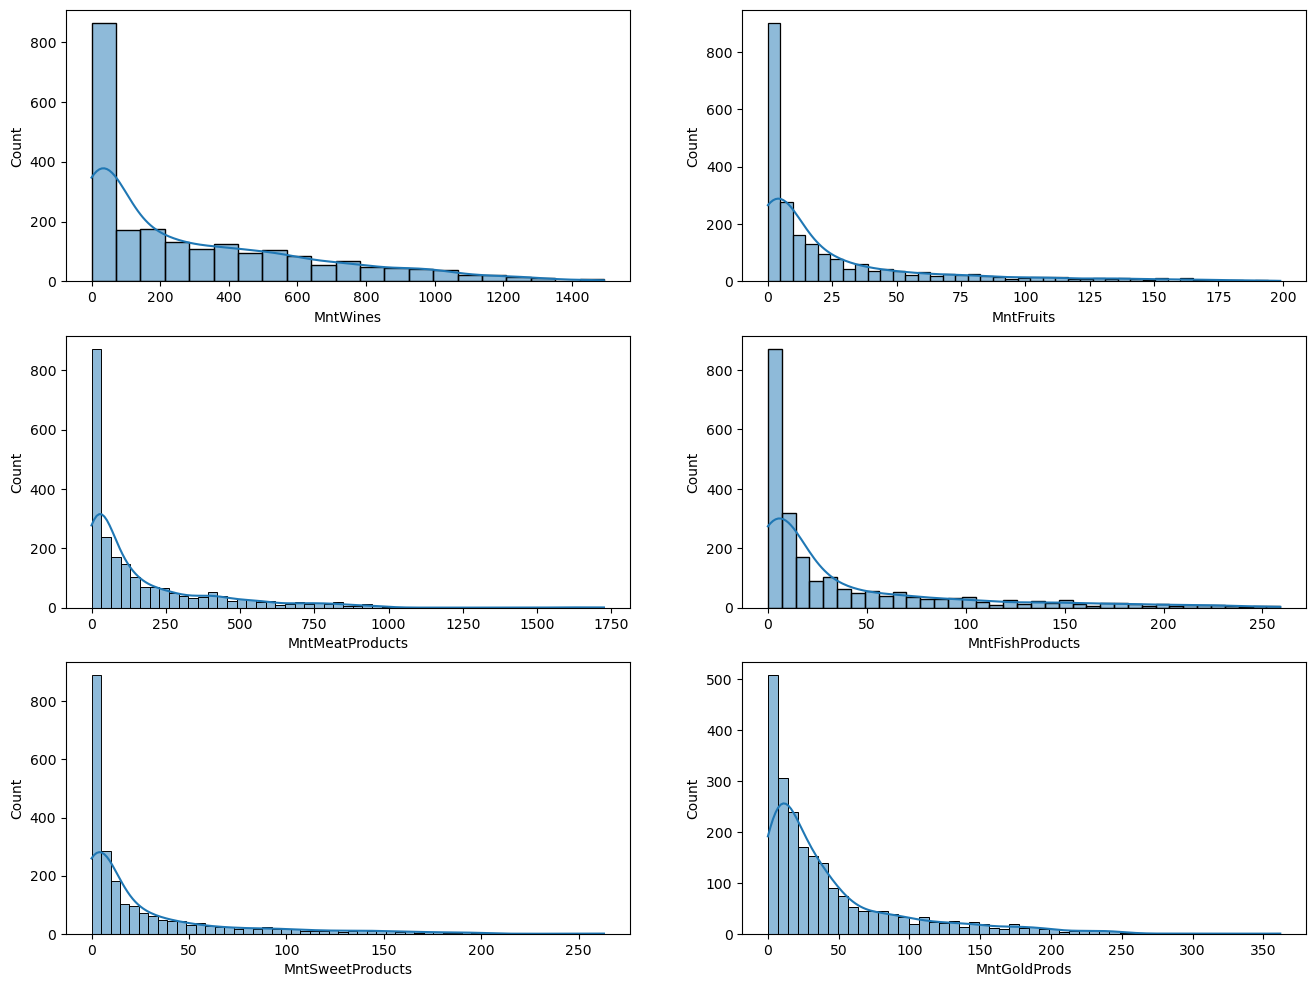

In [83]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

sns.histplot(data=df, x='MntWines', kde=True, label='MntWines', ax=axs[0,0])
sns.histplot(data=df, x='MntFruits', kde=True, label='MntFruits', ax=axs[0,1])
sns.histplot(data=df, x='MntMeatProducts', kde=True, label='MntMeatProducts', ax=axs[1,0])
sns.histplot(data=df, x='MntFishProducts', kde=True, label='MntFishProducts', ax=axs[1,1])
sns.histplot(data=df, x='MntSweetProducts', kde=True, label='MntSweetProducts', ax=axs[2,0])
sns.histplot(data=df, x='MntGoldProds', kde=True, label='MntGoldProds', ax=axs[2,1])



Berdasarkan pada distribusi data yang dicheck pada column dari setiap produk yang dibeli oleh customer, maka dapat dilihat bahwa dari semua column memiliki distribusi data yang tidak normal (Right-Skewed), hal ini berarti bahwa saya harus menggunaakan `median` aggregation untuk melakukan analysis terhadap column2 tersebut.

In [84]:
avg_Products = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median(axis=0)

fig = px.pie(values=avg_Products.values, names=avg_Products.index,  
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Average Amount Spent on Product', title_x=0.5,
                  legend=dict(
                      yanchor="top",
                      y=0.75,
                      xanchor="right",
                      x=0.75
                  ))

Melalui Visualisasi diatas, dapat ditarik kesimpulan bahwasannya:
- Produk `Wines` memiliki nilai penjualan yang tertinggi dengan mengambil average __59.3%__ dari total produk yang dibeli oleh customer
- Selanjutnya diikuti oleh produk `Meat` di posisi kedua dengan __22.9%__ average dari total produk yang dibeli oleh customer
- Lalu ada produk `Gold` pada posisi ketiga dengan average  __8.21%__
- Selanjutnya ada produk `Fish` dengan average __4.1%__
- yang terakhir ada produk `fruits` dan `sweet` yang memiliki average yang sama pada __2.74%__

Dengan mengetahui presentase product yang berhasil dijual, supermarket dapat menentukan rencana dan strategi yang baik berdasarkan avarege penjualan produk-produk diatas
- Supermarket dapat memfokuskan untuk lebih mempromosikan dan meningkatkan penjualan mereka terhadap produk `wines`, dan `meat`, karena kedua produk ini merupakan penyumbang revenue terbanyak untuk supermarket.
- Mengetahui segementasi pasar untuk setiap produk juga dapat membantu supermarket untuk membangun strategi marketing yang tepat sasaran dan efektif, hal ini akan dianalisis lebih lanjut melalui RFM analysis.
- Untuk produk-produk yang tidak begitu populer di supermarket seperti `fruits` dan `sweets`, supermarket dapat merencakan strategi2 baru untuk menarik customer2 dapat melirik produk2 tersebut, atau mungkin saja customer2 yang dapat dijangkau oleh supermarket bukanlah pasar yang tepat untuk produk2 tersebut.

### Check Correlation between the columns of Purchases Sales

In [85]:
df.columns

Index(['ID', 'Age', 'Age_Category', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Income', 'Dt_Customer', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'OnlineP', 'OfflineP', 'Recency', 'Frequency',
       'Monatery'],
      dtype='object')

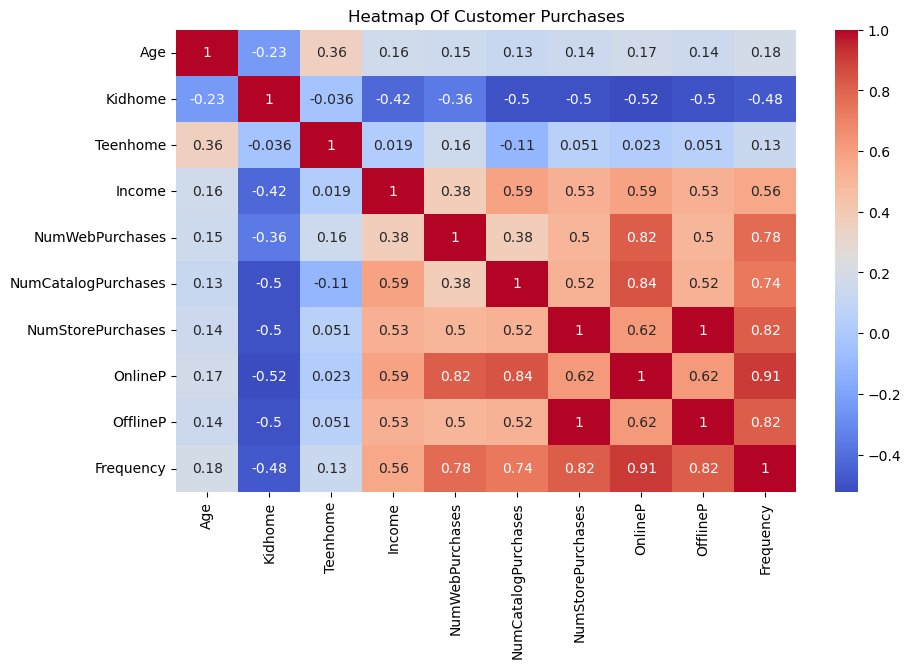

In [86]:
# Calculate correlations
C_purchases = df[['Age', 'Kidhome','Teenhome','Income', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'OnlineP', 'OfflineP', 'Frequency']].corr()

# correlation

plt.figure(figsize= (10,6))
sns.heatmap(C_purchases, annot=True, cmap='coolwarm')
plt.title('Heatmap Of Customer Purchases')
plt.show()




Berdasarkan uji korelasi yang sudah dilakukan diatas, ada beberapa kesimpulan yang dapat diambil untuk analysis kedepannya:

- Column `Age` memiliki correlation yang positive dengan frequency pembelian, hanya saja correlation yang terjadi diantaranya tidak begitu kuat 
- Column `Kidhome` memiliki corelasi yang negative dengan frequency pembelian dan corelasi yang terbentuk lumayan kuat
- Column `Teenhome` memiliki corelasi yang negative pada frequency pembelian, tetapi tetap saja corelasi yang ada tidak begitu kuat
- Column `Income` memiliki corelasi yang positive dengan frequency pembelian, corelasi yang terjadipun kebanyakan kuat
- Perbedaan antara customer preferensi untuk membeli barang secara online maupun offline tidak jauh berbeda



<Axes: xlabel='OfflineP', ylabel='Count'>

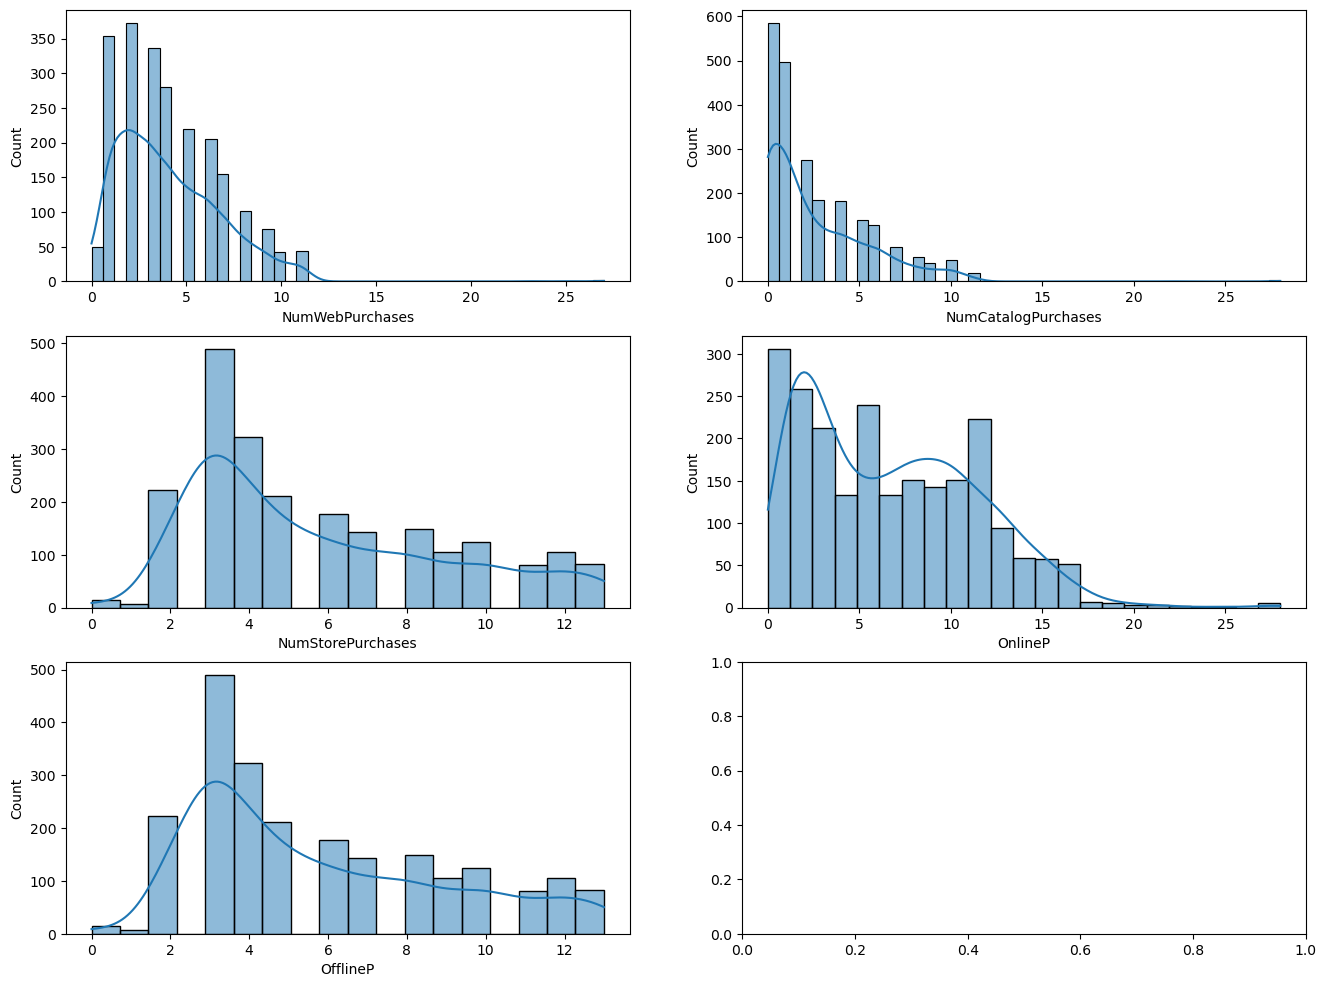

In [89]:
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

sns.histplot(data=df, x='NumWebPurchases', kde=True, label='NumWebPurchases', ax=axs[0,0])
sns.histplot(data=df, x='NumCatalogPurchases', kde=True, label='NumCatalogPurchases', ax=axs[0,1])
sns.histplot(data=df, x='NumStorePurchases', kde=True, label='NumStorePurchases', ax=axs[1,0])
sns.histplot(data=df, x='OnlineP', kde=True, label='OnlineP', ax=axs[1,1])
sns.histplot(data=df, x='OfflineP', kde=True, label='OfflineP', ax=axs[2,0])



Berdasarkan pada distribusi data yang dicheck pada column dari setiap preferensi pembelian yang dilakukan oleh customer, maka dapat dilihat bahwa dari semua column memiliki distribusi data yang tidak normal (Right-Skewed), hal ini berarti bahwa saya harus menggunaakan `median` aggregation untuk melakukan analysis terhadap column2 tersebut.

In [90]:
avg_Purchases1 = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].median(axis=0)
avg_Purchases2 = df[['OnlineP', 'OfflineP']].median(axis=0)

avg_Purchases1 = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].median(axis=0)
avg_Purchases2 = df[['OnlineP', 'OfflineP']].median(axis=0)

# Plot first pie chart (Purchase Channels)
fig1 = px.pie(values=avg_Purchases1.values, names=avg_Purchases1.index, title='Purchase Preferences',
              color_discrete_sequence=px.colors.qualitative.Vivid_r)
fig1.update_traces(marker=dict(line=dict(color='#000000', width=2)))  # Add black border to pie slices
fig1.show()

# Plot second pie chart (Online vs. Offline)
fig2 = px.pie(values=avg_Purchases2.values, names=avg_Purchases2.index, title='Online vs. Offline',
              color_discrete_sequence=px.colors.qualitative.Bold)
fig2.update_traces(marker=dict(line=dict(color='#000000', width=2)))  # Add black border to pie slices
fig2.show()

1. Pada visualisasi `Purchase Preferences` dapat diambil kesimpulan bahwa:
    - Untuk purchases preference yang digunakan oleh customer supermarket, pembelian langsung di supermarket (`NumStorePurchases`) menjadi favorit customer untuk melakukan transaksi dengan presentase `45,5%`
    - Di urutan kedua sebagai favorit para customer ialah pembelian dengan cara online, yaitu melalui web (`NumWebPurchases`) dan catalog (`NumCatalogPurchases`) dengan masing-masing memiliki presentase `36,4%` dan `18,2%`
2. Selanjutnya untuk visualisasi `Online vs Offline` dapat diambil kesimpulan bahwa:
    - Pembelian secara online menjadi pilihan favorit customer untuk melakukan transaksi dengan presentase `54,5%` diikuti oleh offline transaksi dengan presentase `45,5%`

## RFM Analysis

Pada RFM analysis yang akan saya gunakan, disini saya membagi segemntasi menjadi 2 yaitu:
- Segmentasi customer berdasarkan pada `recency` 
- Segmentasi customer berdasarkan pada `Frequency` dan `Monatery`.

Melakukan segmentasi terhadap Recency, Frequency dan Monatery

### 1. Melakukan segmentasi terhadap Recency

In [261]:
df.columns

Index(['ID', 'Age', 'Age_Category', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Income', 'Dt_Customer', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'OnlineP', 'OfflineP', 'Recency', 'Frequency',
       'Monatery', 'S_Recency', 'S_Frequency'],
      dtype='object')

In [92]:
df['Recency'].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

Berdasarkan rentang value yang terdapat pada column `Recency` maka disini saya menentukan scoringnya sebagai berikut:
 - Active : 0 - 24
 - Warm : 25 - 49
 - Cold : 50 - 74
 - Inactive : 75 - 99

Karena rentang value ada pada 0 - 99, maka disini saya membagi rentang value tersebut menjadi 4 Segment berdasarkan pada quantile. Semakin kecil value maka semakin besar scorenya, karena recency disini menggambarkan berapa hari sejak terakhir kali customer melakukan transaksi

In [330]:

def S_Recency(Recency):
    if Recency >= 0 and Recency <= 24:
        return 'Active'
    elif Recency >= 25 and Recency <= 49:
        return 'Warm'
    elif Recency >= 50 and Recency <= 74:
        return 'Cold'
    elif Recency >= 75 and Recency <= 99:
        return 'Inactive'
    else:
        return 'Unknown'
    
df['S_Recency'] = df['Recency'].apply(S_Recency)

print(df[['ID', 'Recency', 'S_Recency']])

         ID  Recency S_Recency
0      5524       58      Cold
1      2174       38      Warm
2      4141       26      Warm
3      6182       26      Warm
4      5324       94  Inactive
...     ...      ...       ...
2235  10870       46      Warm
2236   4001       56      Cold
2237   7270       91  Inactive
2238   8235        8    Active
2239   9405       40      Warm

[2240 rows x 3 columns]


In [ ]:
colors = {'Active': 'green', 'Warm': '#FF8C00', 'Cold': '#9370DB',  'Inactive': 'gray' }


plt.figure(figsize=(10, 6))
for segment, color in colors.items():
    segment_recency = df[df['S_Recency'] == segment]['Recency']
    plt.hist(segment_recency, bins=30, color=color, alpha=0.5, label=segment)


plt.xlabel('Recency')
plt.ylabel('Number of Customers')
plt.title('Histogram of Recency by Segment')
plt.legend()


plt.grid(True)
plt.show()

In [ ]:
df['Dt_Customer'].value_counts()

Berdasarkan data dari column `Dt_Customer` bahwasannya data terakhir yang ada di dataset ini adalah `2014-06`. 

In [ ]:
sns.histplot(data=df, x='Monatery', kde=True, label='Monatery')

In [229]:

total_sum = df.groupby("S_Recency")["Monatery"].median().sum()


median_monatery = df.groupby("S_Recency")["Monatery"].median().reset_index()


median_monatery['Monatery_percentage1'] = (median_monatery['Monatery'] / total_sum) * 100
median_monatery_sorted1 = median_monatery.sort_values(by='Monatery_percentage1', ascending=False)


print(median_monatery_sorted1)


  S_Recency  Monatery  Monatery_percentage1
1      Cold     458.0             30.452128
3      Warm     369.0             24.534574
0    Active     368.0             24.468085
2  Inactive     309.0             20.545213


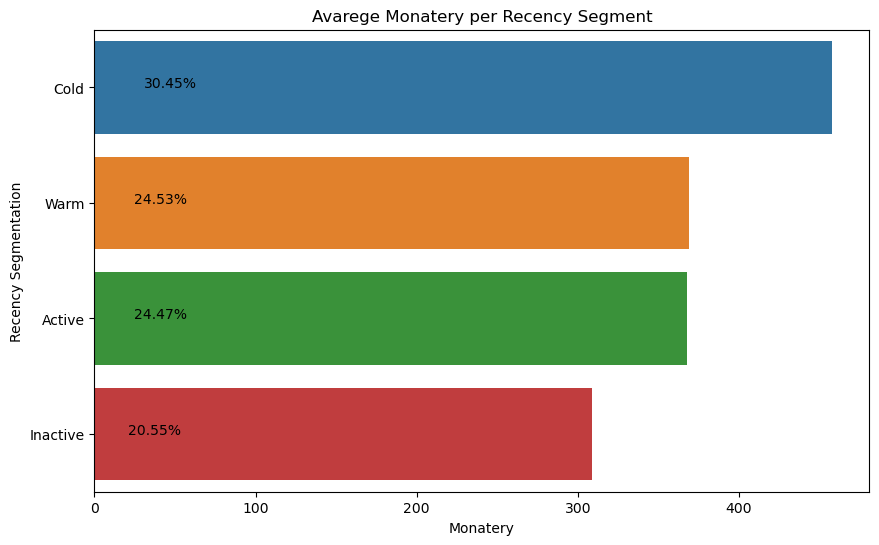

In [234]:
percentages = median_monatery_sorted1['Monatery_percentage1']

plt.figure(figsize=(10, 6))
sns.barplot(x="Monatery", y="S_Recency", data=median_monatery_sorted1)
plt.title("Avarege Monatery per Recency Segment")
plt.xlabel("Monatery")
plt.ylabel("Recency Segmentation")

for i, val in enumerate(percentages):
    plt.text(val, i, f'{val:.2f}%', va='baseline')

plt.show()


### 2. Melakukan Segmentasi customer berdasarkan Frequency dan Monatery

In [94]:
df['Frequency'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: Frequency, dtype: float64

Berdasarkan rentang value yang terdapat pada column `Frequency` maka disini saya menentukan scoringnya sebagai berikut:
 - Special Value : 21 - 44
 - High Value : 15 - 20
 - Normal Value : 8 - 14
 - Low Value : 0 - 7

Karena rentang value ada pada 0 - 44, maka disini saya membagi rentang value tersebut menjadi 4 segmentasi. Semakin besar value maka semakin besar scorenya, karena frequency disini menggambarkan seberapa sering customer melakukan transaksi dalam periode waktu dari awal customer enroll dengan supermarket.

In [167]:
def S_Frequency(Frequency):
    if Frequency >= 32 and Frequency <= 44:
        return 'Special Value'
    elif Frequency >= 19 and Frequency <= 31:
        return 'High Value'
    elif Frequency >= 8 and Frequency <= 18:
        return 'Normal Value'
    elif Frequency >= 0 and Frequency <= 7:
        return 'Low Value'
    else:
        return 'Unknown'
    
df['S_Frequency'] = df['Frequency'].apply(S_Frequency)

print(df[['ID', 'Frequency', 'S_Frequency']])

         ID  Frequency   S_Frequency
0      5524         25    High Value
1      2174          6     Low Value
2      4141         21    High Value
3      6182          8  Normal Value
4      5324         19    High Value
...     ...        ...           ...
2235  10870         18  Normal Value
2236   4001         22    High Value
2237   7270         19    High Value
2238   8235         23    High Value
2239   9405         11  Normal Value

[2240 rows x 3 columns]


In [235]:
df['S_Frequency'].value_counts()

S_Frequency
Normal Value     882
High Value       777
Low Value        556
Special Value     25
Name: count, dtype: int64

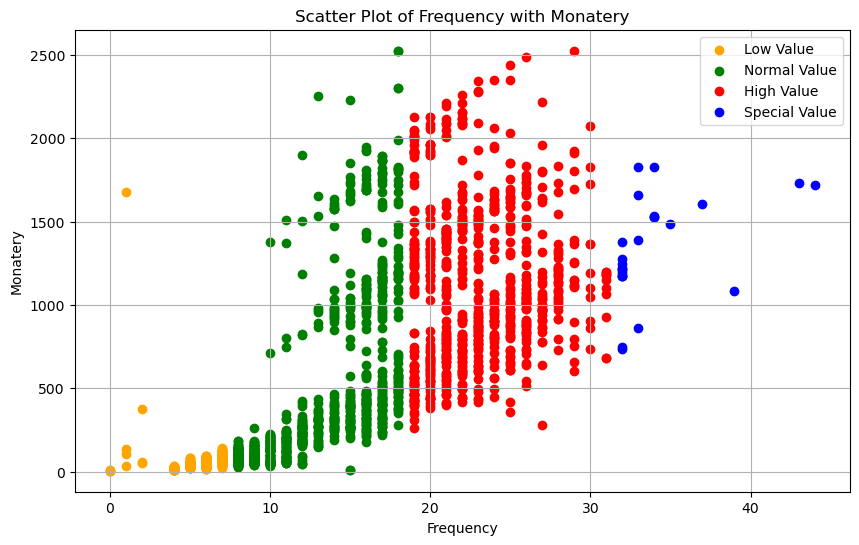

In [170]:
colors = {'Low Value': 'orange', 'Normal Value': 'green', 'High Value': 'red', 'Special Value': 'blue' }

# Create scatter plot
plt.figure(figsize=(10, 6))
for segment, color in colors.items():
    segment_data = df[df['S_Frequency'] == segment]
    plt.scatter(segment_data['Frequency'], segment_data['Monatery'], color=color, label=segment)

# Labels and legend
plt.xlabel('Frequency')
plt.ylabel('Monatery')
plt.title('Scatter Plot of Frequency with Monatery')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

<Axes: xlabel='Monatery', ylabel='Count'>

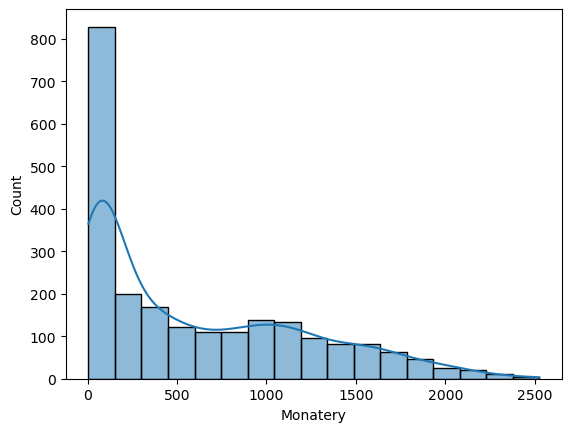

In [190]:
sns.histplot(data=df, x='Monatery', kde=True, label='Monatery')


In [232]:

total_sum = df.groupby("S_Frequency")["Monatery"].median().sum()


median_monatery = df.groupby("S_Frequency")["Monatery"].median().reset_index()


median_monatery['Monatery_percentage'] = (median_monatery['Monatery'] / total_sum) * 100
median_monatery_sorted = median_monatery.sort_values(by='Monatery_percentage', ascending=False)


print(median_monatery_sorted)


     S_Frequency  Monatery  Monatery_percentage
3  Special Value    1274.0            48.285010
0     High Value    1052.0            39.871139
2   Normal Value     270.5            10.252037
1      Low Value      42.0             1.591814


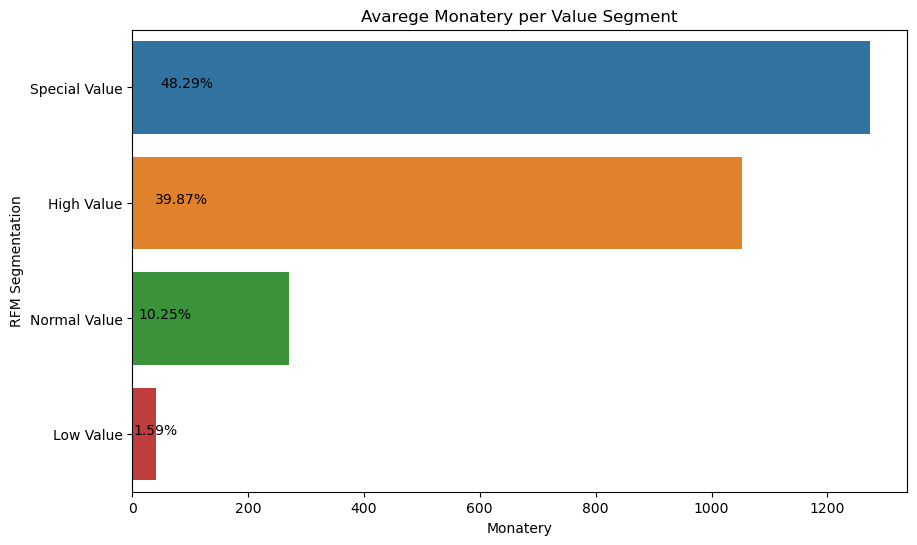

In [233]:
percentages = median_monatery_sorted['Monatery_percentage']

plt.figure(figsize=(10, 6))
sns.barplot(x="Monatery", y="S_Frequency", data=median_monatery_sorted)
plt.title("Avarege Monatery per Value Segment")
plt.xlabel("Monatery")
plt.ylabel("RFM Segmentation")

for i, val in enumerate(percentages):
    plt.text(val, i, f'{val:.2f}%', va='baseline')

plt.show()


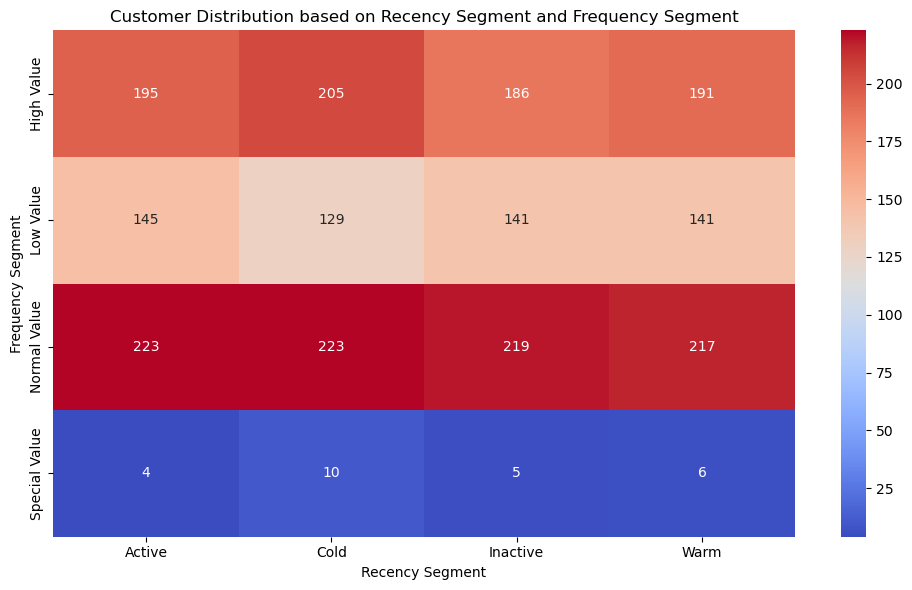

In [260]:
Distribution = df.groupby(['S_Frequency', 'S_Recency']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(Distribution, annot=True, cmap='coolwarm', fmt='g')

plt.xlabel('Recency Segment')
plt.ylabel('Frequency Segment')
plt.title('Customer Distribution based on Recency Segment and Frequency Segment')

plt.tight_layout()  
plt.show()

Suggestion and Recomendation based on the Recency Segmentation

Berdasarkan dari analisis mengenai segmentasi customer terhadap recency mereka, dapat diambil kesimpulan bahwa:
 - Terdapat `24.47%` Customer `active` yang melakukan transaksi mereka setidaknya selama 1 bulan kebelakang dari 06-2014 (data terbaru dari DT_Costumer)
 - Lalu ada `24.53%` customer yang melakukan transaksi sudah lebih dari 24 - 50 hari kebelakang dan mereka masuk kedalam category `warm`
 - Setelahnya ada presentase customer terbanyak yaitu sebesar `30.45%` masuk ke dalam category `cold`, dimana mereka sudah lama tidak melakukan transaksi, sekitar 50 - 74 hari yang lalu
 - Lalu segmentasi `inactive` memiliki presentase `20.55%` dimana customer ini sudah lebh dari 75 hari yang lalu melakukan transaksinya

Supermarket berada dalam posisi yang bimbang, karena terdaapt sekitar 50% customer yang melakukan transaksi dalam 2bulan terakhir (tidak menutup kemungkinan adanya customer baru), dan juga ada 50% customer lainnya yang sudah tidak melakukan transaksi lagi lebih dari 2bulan. Supermarket perlu melakukan peninjauan ulang agar strateginya dapat menarik lebih banyak cutomer baru dan tidak melupakan customer lama untuk dipertahankan juga, sehingga rata-rata penjualan akan meningkat dan stabil.    

Berikut merupakan beberapa suggestion dan recomendation untuk recency segmentation:
 - Active Segment : Bisa lebih fokus untuk meningkatkan daya beli customer, bisa dengan menawarkan beberapa produk yang relate dengan mereka (Upselling / Crossselling)
 - Warm Segment : Fokus kepada retention strategy
 - Cold Segment : fokus untuk menarik kembali minat belanja customer ini dengan reactivate atau retention strategy
 - Inactive Segment : Fokus untuk memberi reactivate strategy untuk menarik perhatian customer ini

Suggestion and Recomendation based on the Frequency Segmentation with Monatery

Berdasarkan dari analisis mengenai segmentasi customer terhadap Frequency mereka dengan jumlah uang yang dikeluakan, dapat diambil kesimpulan bahwa:
 - Customer dengan segmentasi `Special Value` menyumbang sekitar `48.29%` sebagai revenue untuk supermarket
 - Lalu diikuti oleh segmentasi `High Valie` yang berkontribusi sekitar `39.78%` untuk supermarket
 - Setelahnya ada `Normal Customer` yang memilki andil dalam revenue supermarket sebanyak `10.25%`
 - Lalu segmentasi `Low Value` dengan kontribusi paling sedikit di sekitar `1.59%`

Revenue dari supermarket masih dalam keadaan yang aman dan baik, tetapi hal ini tidak berarti supermarket bisa lepas tangan, karena penyumbang terbesar untuk revenue supermarket `48.29%` hanya berasal dari 25 customer dan 10 diantaranya sedang dalam posisi `cold` berdasarkan transaksi terakhir mereka, sehingga supermarket harus mencari cara untuk meningkatkan revenue dan juga mempertahankan kesetiaan customer atau mungkin saja menarik kemabali customer yang sudah lama tidak melakukan transaksi   

Berikut merupakan beberapa suggestion dan recomendation untuk Frequency segmentation:
 - Customer special value dan high value sudah berkontribusi untuk 87% dari revenue supermarket, ini berarti supermarket dapat memfokuskan budget, effort, penwaran dan strategi mereka terhadapt dua segement ini, untuk memjaga kesetiaan customer dan meningkatkan value mereka.
 - Terdapat sekitar 20% customer yang masuk ke dalam category `Low Value`, meskipun kontribusi mereka ke revenue supermarket sangat sedikit tetapi alangkah baiknya mereka tidak dilupakan, karena mungkin saja ada dari mereka yang meruapakan customer baru sehingga kontribusi mereka masih lah sedikit, fokuskan penwaran dan pendekatan kepada mereka yang `Low Value` tapi `Actiive` karena mereka dapat disebut sebagai customer yang potential bagi supermarket kedepannya.
 - Membuat program yang bisa meningkatkan value dan kesetiaan para customer terhadap supermarket. Misalnya dengan subscription, membership. Lalu dari membership dan subscription para customer dapt diberi penawaran-penawaran menarik, seperti cahsback, diskon, promo, paket dan lain sebagainya. 

## Costumer Personalizations and Preferences

Setelah melakukan RFM Analysis, supermarket dapat melihat beberapa segementasi customer berdasarkan recency, frequency dan monatery. Dengan melihat analysis itu, supermarket bisa mnyusun stategi marketing yang lebih efficient dan tepat sasaran sesuai dengan segmentasi customer tersebut. Tetapi, supermarket bisa saja melakukan approach yang lebih personal dengan setiap customer dengan memberikan penawaran yang sesuai dengan apa yang diharapkan dan dibutuhkan oleh customer. 

### 1. Product Personalization

In [262]:
df

,ID,Age,Age_Category,Education,Marital_Status,Kidhome,Teenhome,Income,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,OnlineP,OfflineP,Recency,Frequency,Monatery,S_Recency,S_Frequency
0,5524,57,Adult,Graduation,Single,0,0,58138.0,2012-09,635,88,546,172,88,88,8,10,4,18,4,58,25,1617,Cold,High Value
1,2174,60,Adult,Graduation,Single,1,1,46344.0,2014-03,11,1,6,2,1,6,1,1,2,2,2,38,6,27,Warm,Low Value
2,4141,49,Adult,Graduation,Together,0,0,71613.0,2013-08,426,49,127,111,21,42,8,2,10,10,10,26,21,776,Warm,High Value
3,6182,30,Adult,Graduation,Together,1,0,26646.0,2014-02,11,4,20,10,3,5,2,0,4,2,4,26,8,53,Warm,Normal Value
4,5324,33,Adult,PhD,Together,1,0,58293.0,2014-01,173,43,118,46,27,15,5,3,6,8,6,94,19,422,Inactive,High Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,Adult,Graduation,Together,0,1,61223.0,2013-06,709,43,182,42,118,247,9,3,4,12,4,46,18,1341,Warm,Normal Value
2236,4001,68,Old,PhD,Together,2,1,64014.0,2014-06,406,0,30,0,0,8,8,2,5,10,5,56,22,444,Cold,High Value
2237,7270,33,Adult,Graduation,Single,0,0,56981.0,2014-01,908,48,217,32,12,24,2,3,13,5,13,91,19,1241,Inactive,High Value
2238,8235,58,Adult,Master,Together,0,1,69245.0,2014-01,428,30,214,80,30,61,6,5,10,11,10,8,23,843,Active,High Value


In [264]:
df[df['S_Frequency'] == 'Special Value']

,ID,Age,Age_Category,Education,Marital_Status,Kidhome,Teenhome,Income,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,OnlineP,OfflineP,Recency,Frequency,Monatery,S_Recency,S_Frequency
21,5376,35,Adult,Graduation,Together,1,0,2447.0,2013-01,1,1,1725,1,1,1,0,28,0,28,0,42,43,1730,Warm,Special Value
67,9369,35,Adult,Master,Single,0,1,88194.0,2014-03,688,14,309,201,24,38,11,10,10,21,10,19,32,1274,Active,Special Value
164,8475,41,Adult,PhD,Together,0,1,157243.0,2014-03,20,2,1582,1,2,1,0,22,0,22,0,98,37,1608,Inactive,Special Value
224,7079,52,Adult,Graduation,Single,0,1,63887.0,2012-09,897,23,207,15,11,92,9,6,12,15,12,38,32,1245,Warm,Special Value
287,8148,58,Adult,Master,Together,1,1,50898.0,2013-01,285,28,242,55,114,135,6,2,12,8,12,88,33,859,Inactive,Special Value
412,7030,59,Adult,PhD,Together,0,1,66465.0,2013-03,1200,0,204,38,29,14,11,9,12,20,12,1,35,1485,Active,Special Value
432,238,47,Adult,Master,Together,1,1,67309.0,2013-01,515,47,181,149,95,95,9,6,9,15,9,76,39,1082,Inactive,Special Value
470,2021,39,Adult,Graduation,Together,0,1,61456.0,2013-03,563,76,384,84,192,89,6,10,13,16,13,47,33,1388,Warm,Special Value
627,4299,54,Adult,Graduation,Together,0,1,70971.0,2012-09,1001,17,572,93,125,17,11,11,5,22,5,28,34,1825,Warm,Special Value
636,6945,62,Adult,Graduation,Single,0,0,84574.0,2013-06,387,20,713,38,54,163,9,11,11,20,11,72,32,1375,Cold,Special Value


In [278]:
cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
correlationn = df.groupby(["S_Recency", "S_Frequency"])[cols].agg('median').reset_index()
correlationn.columns = ['S_Recency', 'S_Frequency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']
correlationn

,S_Recency,S_Frequency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Active,High Value,507.0,28.0,230.0,46.0,32.0,45.0
1,Active,Low Value,11.0,1.0,8.0,2.0,1.0,5.0
2,Active,Normal Value,151.0,7.0,53.0,11.0,7.0,22.0
3,Active,Special Value,589.0,7.0,256.5,27.5,26.0,17.5
4,Cold,High Value,510.0,27.0,188.0,44.0,30.0,60.0
5,Cold,Low Value,11.0,2.0,10.0,3.0,1.0,7.0
6,Cold,Normal Value,163.0,10.0,68.0,13.0,12.0,29.0
7,Cold,Special Value,757.0,43.0,217.0,33.5,69.0,65.0
8,Inactive,High Value,556.5,37.5,238.0,47.5,34.5,54.5
9,Inactive,Low Value,13.0,1.0,9.0,2.0,1.0,6.0


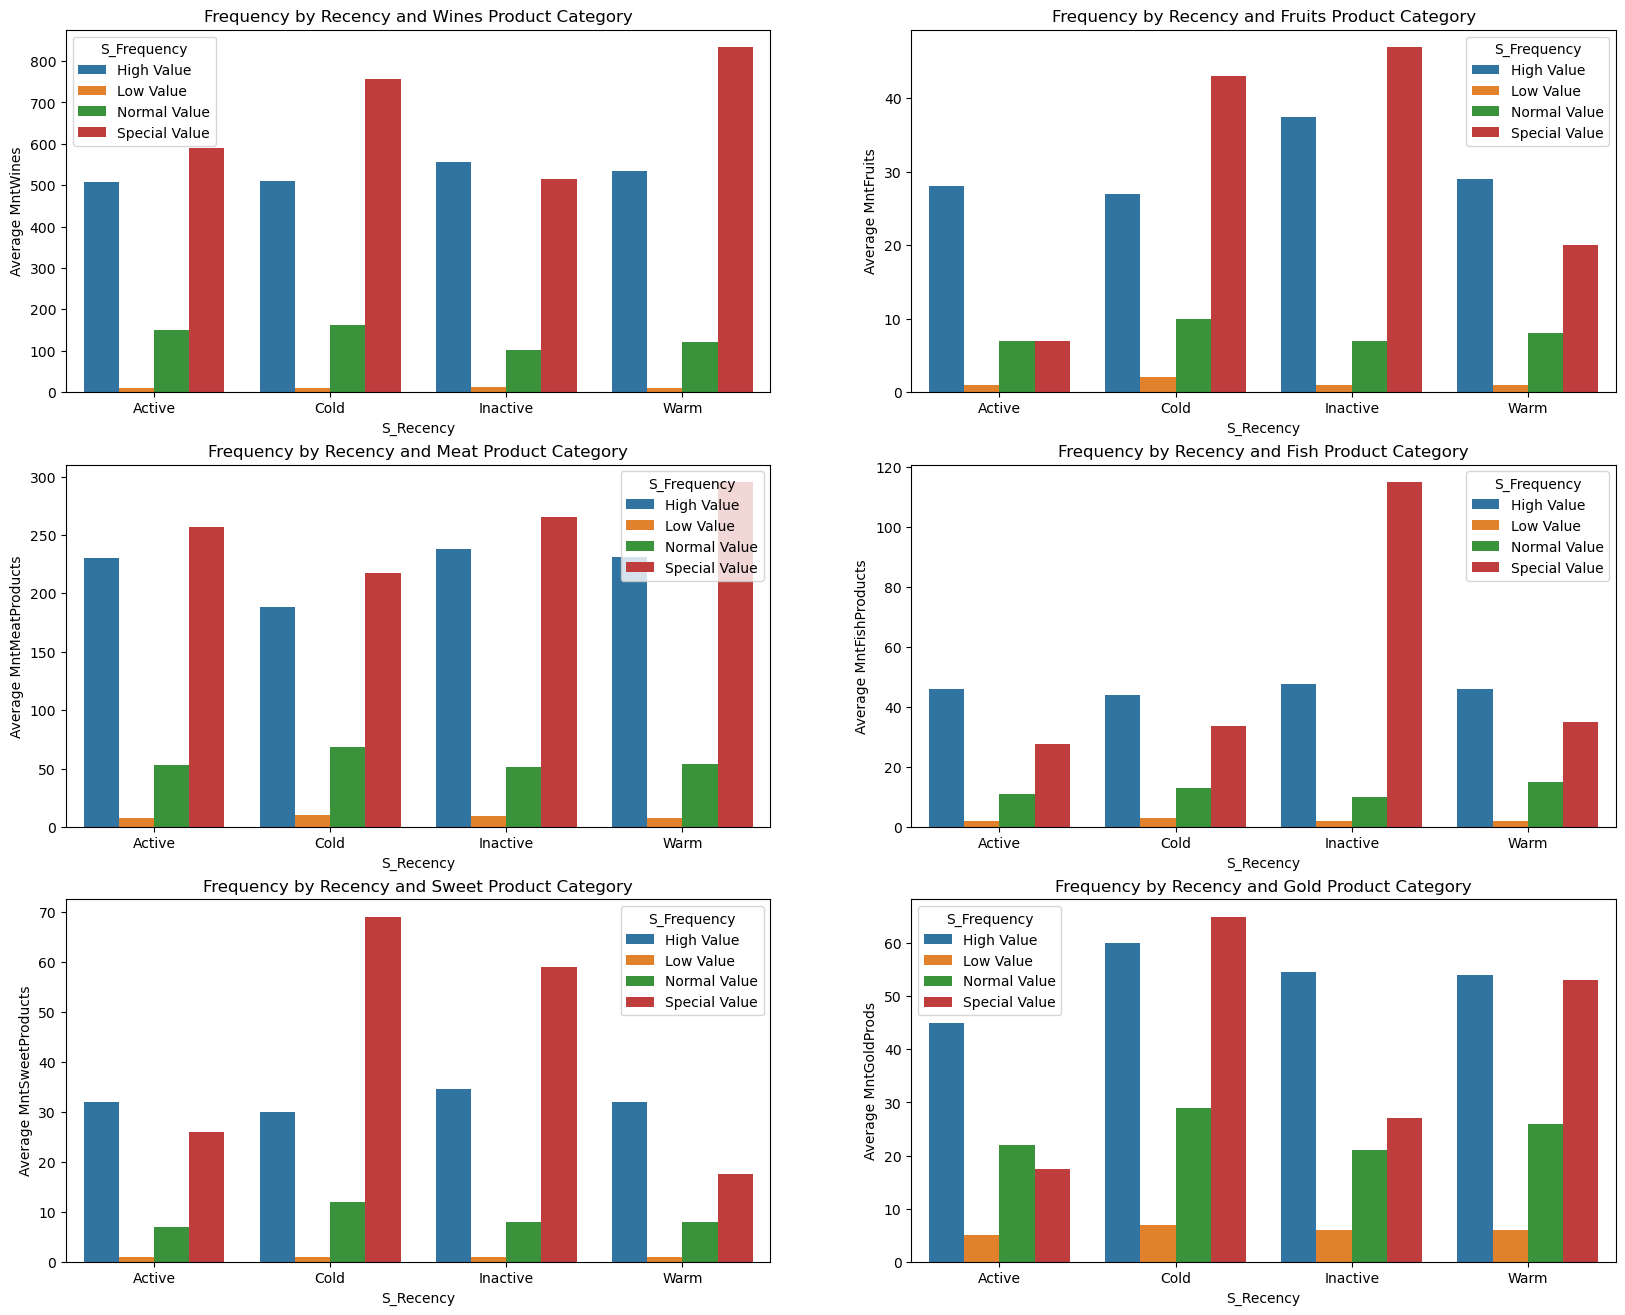

In [304]:
fig, axs = plt.subplots(3, 2, figsize=(20, 16))

sns.barplot(x="S_Recency", y="MntWines", hue="S_Frequency", data=correlationn, ax=axs[0,0])
axs[0,0].set_title("Frequency by Recency and Wines Product Category")
axs[0,0].set_xlabel("S_Recency")
axs[0,0].set_ylabel("Average MntWines")

sns.barplot(x="S_Recency", y="MntFruits", hue="S_Frequency", data=correlationn, ax=axs[0,1])
axs[0,1].set_title("Frequency by Recency and Fruits Product Category")
axs[0,1].set_xlabel("S_Recency")
axs[0,1].set_ylabel("Average MntFruits")

sns.barplot(x="S_Recency", y="MntMeatProducts", hue="S_Frequency", data=correlationn, ax=axs[1,0])
axs[1,0].set_title("Frequency by Recency and Meat Product Category")
axs[1,0].set_xlabel("S_Recency")
axs[1,0].set_ylabel("Average MntMeatProducts")

sns.barplot(x="S_Recency", y="MntFishProducts", hue="S_Frequency", data=correlationn, ax=axs[1,1])
axs[1,1].set_title("Frequency by Recency and Fish Product Category")
axs[1,1].set_xlabel("S_Recency")
axs[1,1].set_ylabel("Average MntFishProducts")

sns.barplot(x="S_Recency", y="MntSweetProducts", hue="S_Frequency", data=correlationn, ax=axs[2,0])
axs[2,0].set_title("Frequency by Recency and Sweet Product Category")
axs[2,0].set_xlabel("S_Recency")
axs[2,0].set_ylabel("Average MntSweetProducts")

sns.barplot(x="S_Recency", y="MntGoldProds", hue="S_Frequency", data=correlationn, ax=axs[2,1])
axs[2,1].set_title("Frequency by Recency and Gold Product Category")
axs[2,1].set_xlabel("S_Recency")
axs[2,1].set_ylabel("Average MntGoldProds")

plt.show()


Berdasarkan pada data visualisasi mengenai segmentasi cutomer terhadap berbagai jenis produk, rekomendasi dan suggestion ialah sebagai berikut:
 - Supermarket dapat fokus untuk memberikan penawaran atau pendekatan kepada customer `Special Value` dengan memberikan produk yang sesuai dengan yang mereka biasanya beli atau spend uang yang banyak yaitu pada produk `wine` dan `meat`. Karena, keduanya memiliki total spend yang tinggi dan juga memilki segementasi recency yang  bagus.
 - Untuk segmentsi lainnya (High, Normal, dan Low Value) supermarket dapat memberikan penawaran untuk setiap produk dengan merata karena graphich menunjukkan masing-masinmg segmentasi setara dengan recency yang mereka miliki. Sehingga penawaran yang merata akan sangat membantu menaikkan value mereka.

### 2. Customer Preferences

In [305]:
df

,ID,Age,Age_Category,Education,Marital_Status,Kidhome,Teenhome,Income,Dt_Customer,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,OnlineP,OfflineP,Recency,Frequency,Monatery,S_Recency,S_Frequency
0,5524,57,Adult,Graduation,Single,0,0,58138.0,2012-09,635,88,546,172,88,88,8,10,4,18,4,58,25,1617,Cold,High Value
1,2174,60,Adult,Graduation,Single,1,1,46344.0,2014-03,11,1,6,2,1,6,1,1,2,2,2,38,6,27,Warm,Low Value
2,4141,49,Adult,Graduation,Together,0,0,71613.0,2013-08,426,49,127,111,21,42,8,2,10,10,10,26,21,776,Warm,High Value
3,6182,30,Adult,Graduation,Together,1,0,26646.0,2014-02,11,4,20,10,3,5,2,0,4,2,4,26,8,53,Warm,Normal Value
4,5324,33,Adult,PhD,Together,1,0,58293.0,2014-01,173,43,118,46,27,15,5,3,6,8,6,94,19,422,Inactive,High Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,Adult,Graduation,Together,0,1,61223.0,2013-06,709,43,182,42,118,247,9,3,4,12,4,46,18,1341,Warm,Normal Value
2236,4001,68,Old,PhD,Together,2,1,64014.0,2014-06,406,0,30,0,0,8,8,2,5,10,5,56,22,444,Cold,High Value
2237,7270,33,Adult,Graduation,Single,0,0,56981.0,2014-01,908,48,217,32,12,24,2,3,13,5,13,91,19,1241,Inactive,High Value
2238,8235,58,Adult,Master,Together,0,1,69245.0,2014-01,428,30,214,80,30,61,6,5,10,11,10,8,23,843,Active,High Value


In [ ]:
sns.histplot(data=df, x='OfflineP', kde=True, label='OfflineP')


In [ ]:
sns.histplot(data=df, x='OnlineP', kde=True, label='OnlineP')


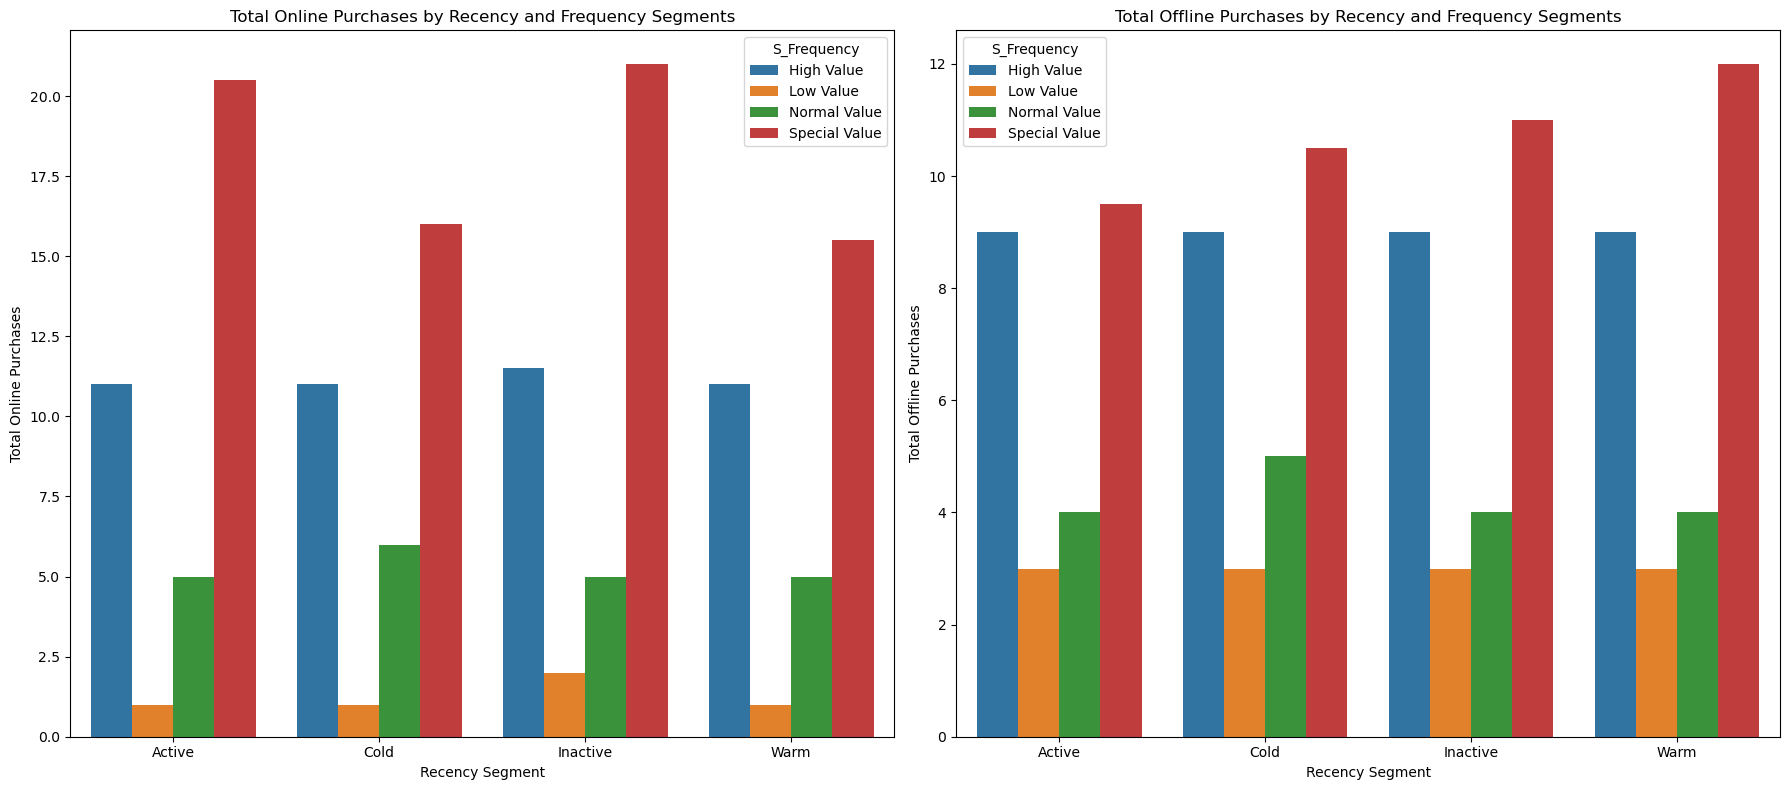

In [318]:
segmented_data = df.groupby(['S_Recency', 'S_Frequency']).agg({
    'OnlineP': 'median',
    'OfflineP': 'median'
}).reset_index()


segmented_data['PurchasePreference'] = 'Online'  
segmented_data.loc[segmented_data['OfflineP'] > segmented_data['OnlineP'], 'PurchasePreference'] = 'Offline'


fig, axs = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='S_Recency', y='OnlineP', hue='S_Frequency', data=segmented_data, ax=axs[0])
axs[0].set_title('Total Online Purchases by Recency and Frequency Segments')
axs[0].set_xlabel('Recency Segment')
axs[0].set_ylabel('Total Online Purchases')

sns.barplot(x='S_Recency', y='OfflineP', hue='S_Frequency', data=segmented_data, ax=axs[1])
axs[1].set_title('Total Offline Purchases by Recency and Frequency Segments')
axs[1].set_xlabel('Recency Segment')
axs[1].set_ylabel('Total Offline Purchases')

plt.tight_layout()
plt.show()


Supermarket memiliki 2 cara untuk melakukan transaksasi, yaitu proses transaksi langsung terjadi di tempat / toko offline hal ini disebut dengan `OfflineP`, sedangkan untuk proses transaksi yang terjual melewati web toko, hal ini disebut dengan `OnlineP`. 

Jika membandingkan pemanfaatan tempat melakukan transaksi, maka saran yang dapat diberikan ialah:
- pada segementasi `Special Value` pembelian di toko offline maupun online memiliki nilai yang tinggi, menandakan bahwa customer di segemntasi ini memiliki preferensi untuk melakukan transaksi secara online maupun offline. 
- Pada segmentasi `High Value` pembelian di toko offline lebih tinggi dibandingkan dengan online, maka supermarket diharapkan untuk memberikan penawaran khusus (diskon ekslusif di toko offline) untuk kemudian dapat mempertahankan kesetiaan dan menaikkan rata-rata penjualan dari segemntasi ini.
- Lalu untuk segemntasi customer `Normal dan Low Value` supermarket dapat fokus untuk memberikan penwaran yang menarik secara online maupun offline untuk kemudian menarik minat customer untuk setidaknya kembali berbelanja di supermarket ini dan jga meningkatkan frequency pembeliannya. Daripada berfokus kepada meningkatkan spend mereka, lebih baik untuk membuat mereka menjadi customer yang memiliki frequency yang bagus dan loyal. 

## Export Data

In [323]:
df.columns

Index(['ID', 'Age', 'Age_Category', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Income', 'Dt_Customer', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'OnlineP', 'OfflineP', 'Recency', 'Frequency',
       'Monatery', 'S_Recency', 'S_Frequency'],
      dtype='object')

In [327]:
df2 = ['ID', 'S_Recency', 'S_Frequency', 'Age_Category', 'Education', 'Marital_Status', 'Kidhome',
       'Teenhome', 'Income', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'OnlineP', 'OfflineP', 'Recency', 'Frequency',
       'Monatery']

df2 = df[df2]

In [328]:
df2

,ID,S_Recency,S_Frequency,Age_Category,Education,Marital_Status,Kidhome,Teenhome,Income,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,OnlineP,OfflineP,Recency,Frequency,Monatery
0,5524,Cold,High Value,Adult,Graduation,Single,0,0,58138.0,635,88,546,172,88,88,18,4,58,25,1617
1,2174,Warm,Low Value,Adult,Graduation,Single,1,1,46344.0,11,1,6,2,1,6,2,2,38,6,27
2,4141,Warm,High Value,Adult,Graduation,Together,0,0,71613.0,426,49,127,111,21,42,10,10,26,21,776
3,6182,Warm,Normal Value,Adult,Graduation,Together,1,0,26646.0,11,4,20,10,3,5,2,4,26,8,53
4,5324,Inactive,High Value,Adult,PhD,Together,1,0,58293.0,173,43,118,46,27,15,8,6,94,19,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Warm,Normal Value,Adult,Graduation,Together,0,1,61223.0,709,43,182,42,118,247,12,4,46,18,1341
2236,4001,Cold,High Value,Old,PhD,Together,2,1,64014.0,406,0,30,0,0,8,10,5,56,22,444
2237,7270,Inactive,High Value,Adult,Graduation,Single,0,0,56981.0,908,48,217,32,12,24,5,13,91,19,1241
2238,8235,Active,High Value,Adult,Master,Together,0,1,69245.0,428,30,214,80,30,61,11,10,8,23,843


In [329]:
df2.to_csv('data_analysis_Supermarket.csv', index = False)